### Learning NNLM
- Decompose the function $f(w_t, ⋯ ,w_{t-n+1}) = \hat{P}(w_t|w_1^{t-1})$ in two parts:  
   - The <u>probability function over words</u>, expressed with $C$: a function $g$ maps an input sequence of feature vectors for words in context, $(C(w_{t-n+1}, ⋯ ,C(w_{t-1}))$, to a conditional probability distribution over words in $V$ for the next word $W_t$.  
   The output of $g$ is a vector whose $i^{th}$ element estimates the probabilty $\hat{P}(w_t = i|w_1^{t-1})$ 

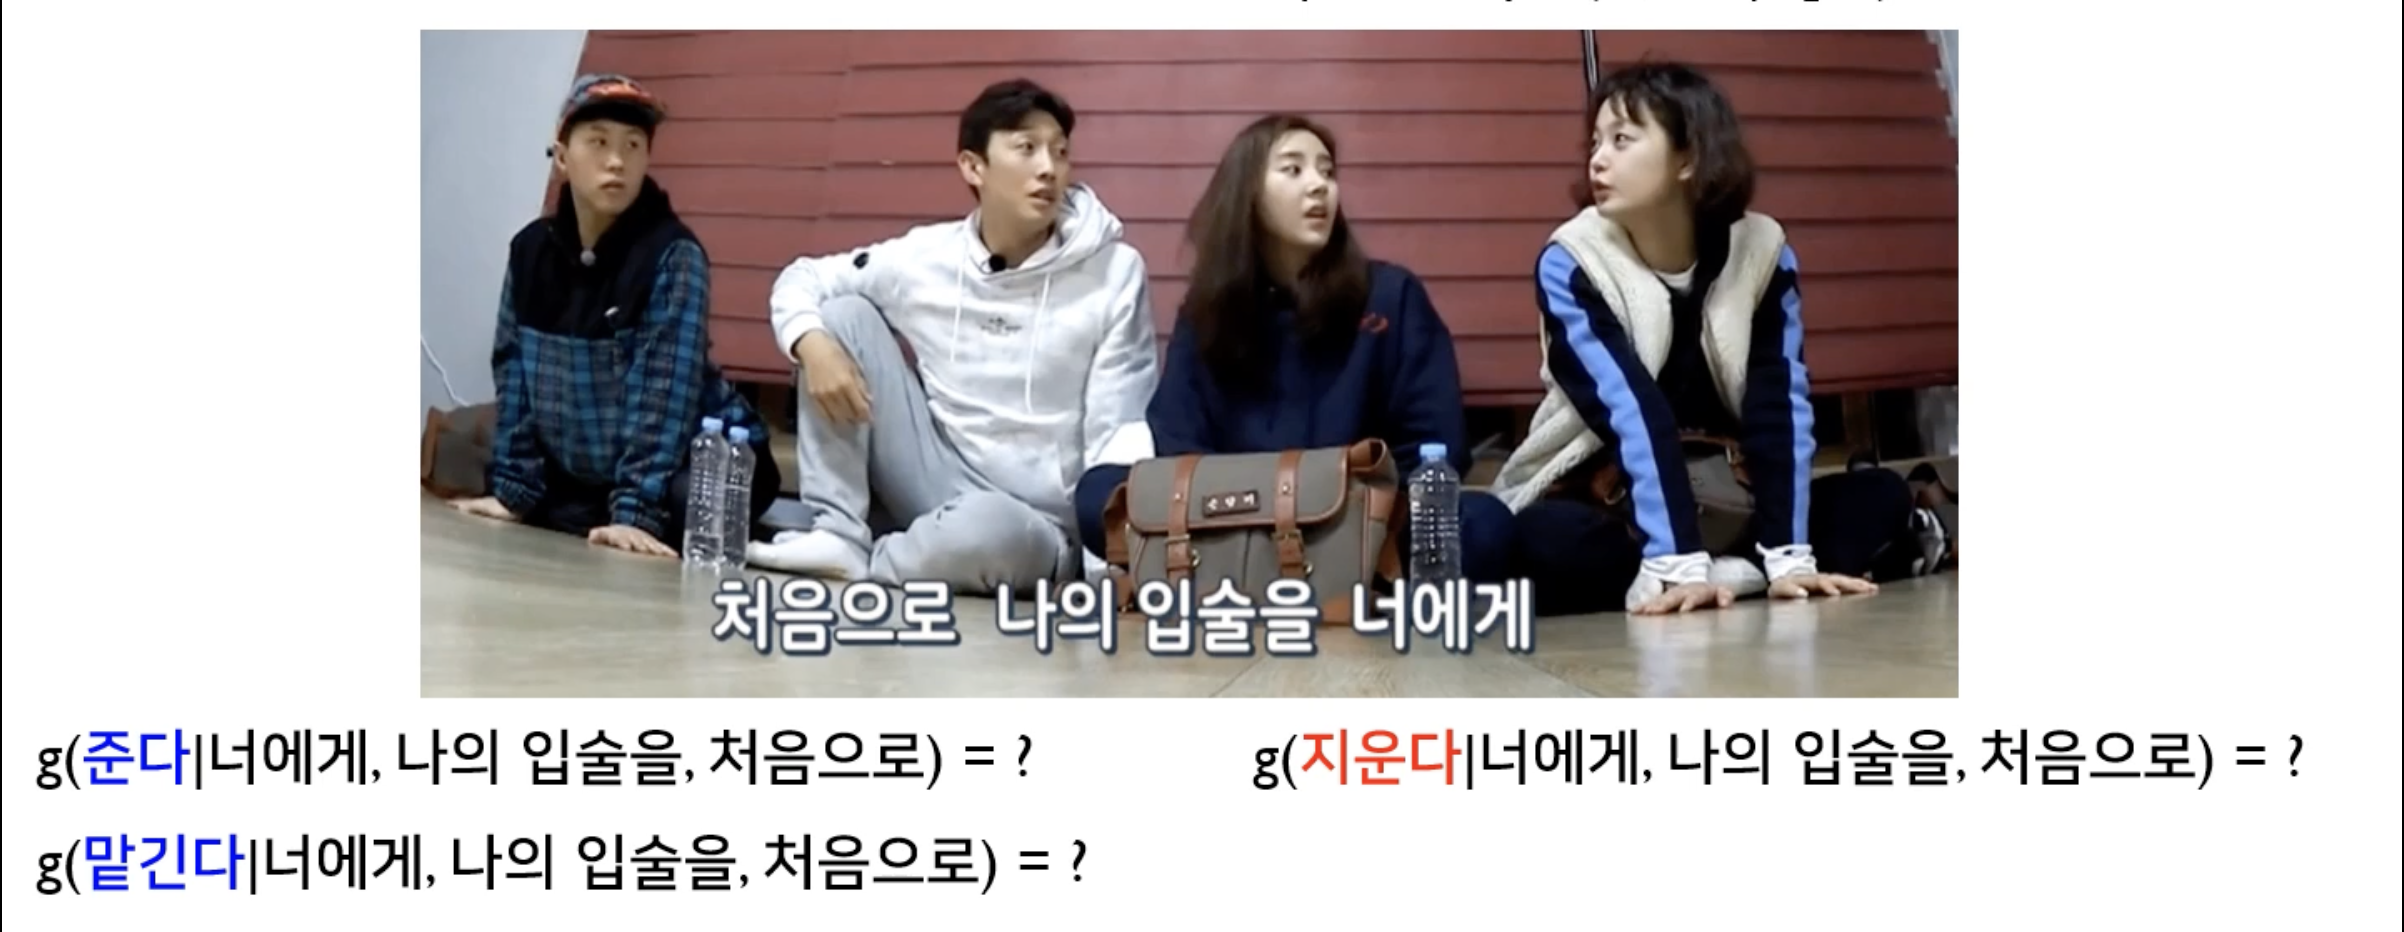

$$ f(i, w_{t-1} ⋯ w_{t-n+1}) = g(i, C(w_{t-1}), ⋯ , C(w_{t-n+1}))$$

- The function f is a composition of these two mappings ($C$ and $g$), with ***$C$ being shared across all the words in the context.***  
   - The parameters of the mapping $C$ are simply the feature vectors themselves, represented by a $|V| × m$ matrix $C$ whose row i is the feature vector $C$(i) for word i
   - The function $g$ may be implemented by a feed-forward or recurrent neural network or another parameterized function, with parameters $w$.

- Training is done by maximizing the penalized log-likelihood of the training corpus  

$$ L = \frac{1}{T} \sum_{t} logf(i, w_{t-1} ⋯ w_{t-n+1};θ) + R(θ)$$

- The neural network has one hidden layer beyond the word features mapping, and optionally, direct connections from the word features to the output.  
- Computation of the output layer  

$$ \hat{P}(w_t|w_{t-1, ⋯ ,w_{t-n+1}}) = \frac{exp(y_{w_t})}{\sum_{i}exp(y_i)}  $$   

$$ y = b + Wx + U · tanh(d + Hx) $$  

>  - $W$ is optionally zero (no direct connections from the input to the output)
>  - $x$ is the word features layer activation vector $ x = (C(w_{t-1}), ⋯ , C(w_{t-n+1}))  $  
>  - $h$ is the number of hidden units

- The free parameters of the model  

$$ y = b + Wx + U · tanh(d + Hx) $$  


>   - the output bias b (|V| elements)
>   - the hidden layer biases d (with h elements)
>   - the hidden-to-output weights U (a |V| by h matrix)
>   - the word features to output weights W (a |V| by (n-1)m matrix)
>   - the hidden layer weight H (a h by (n-1)m matrix)

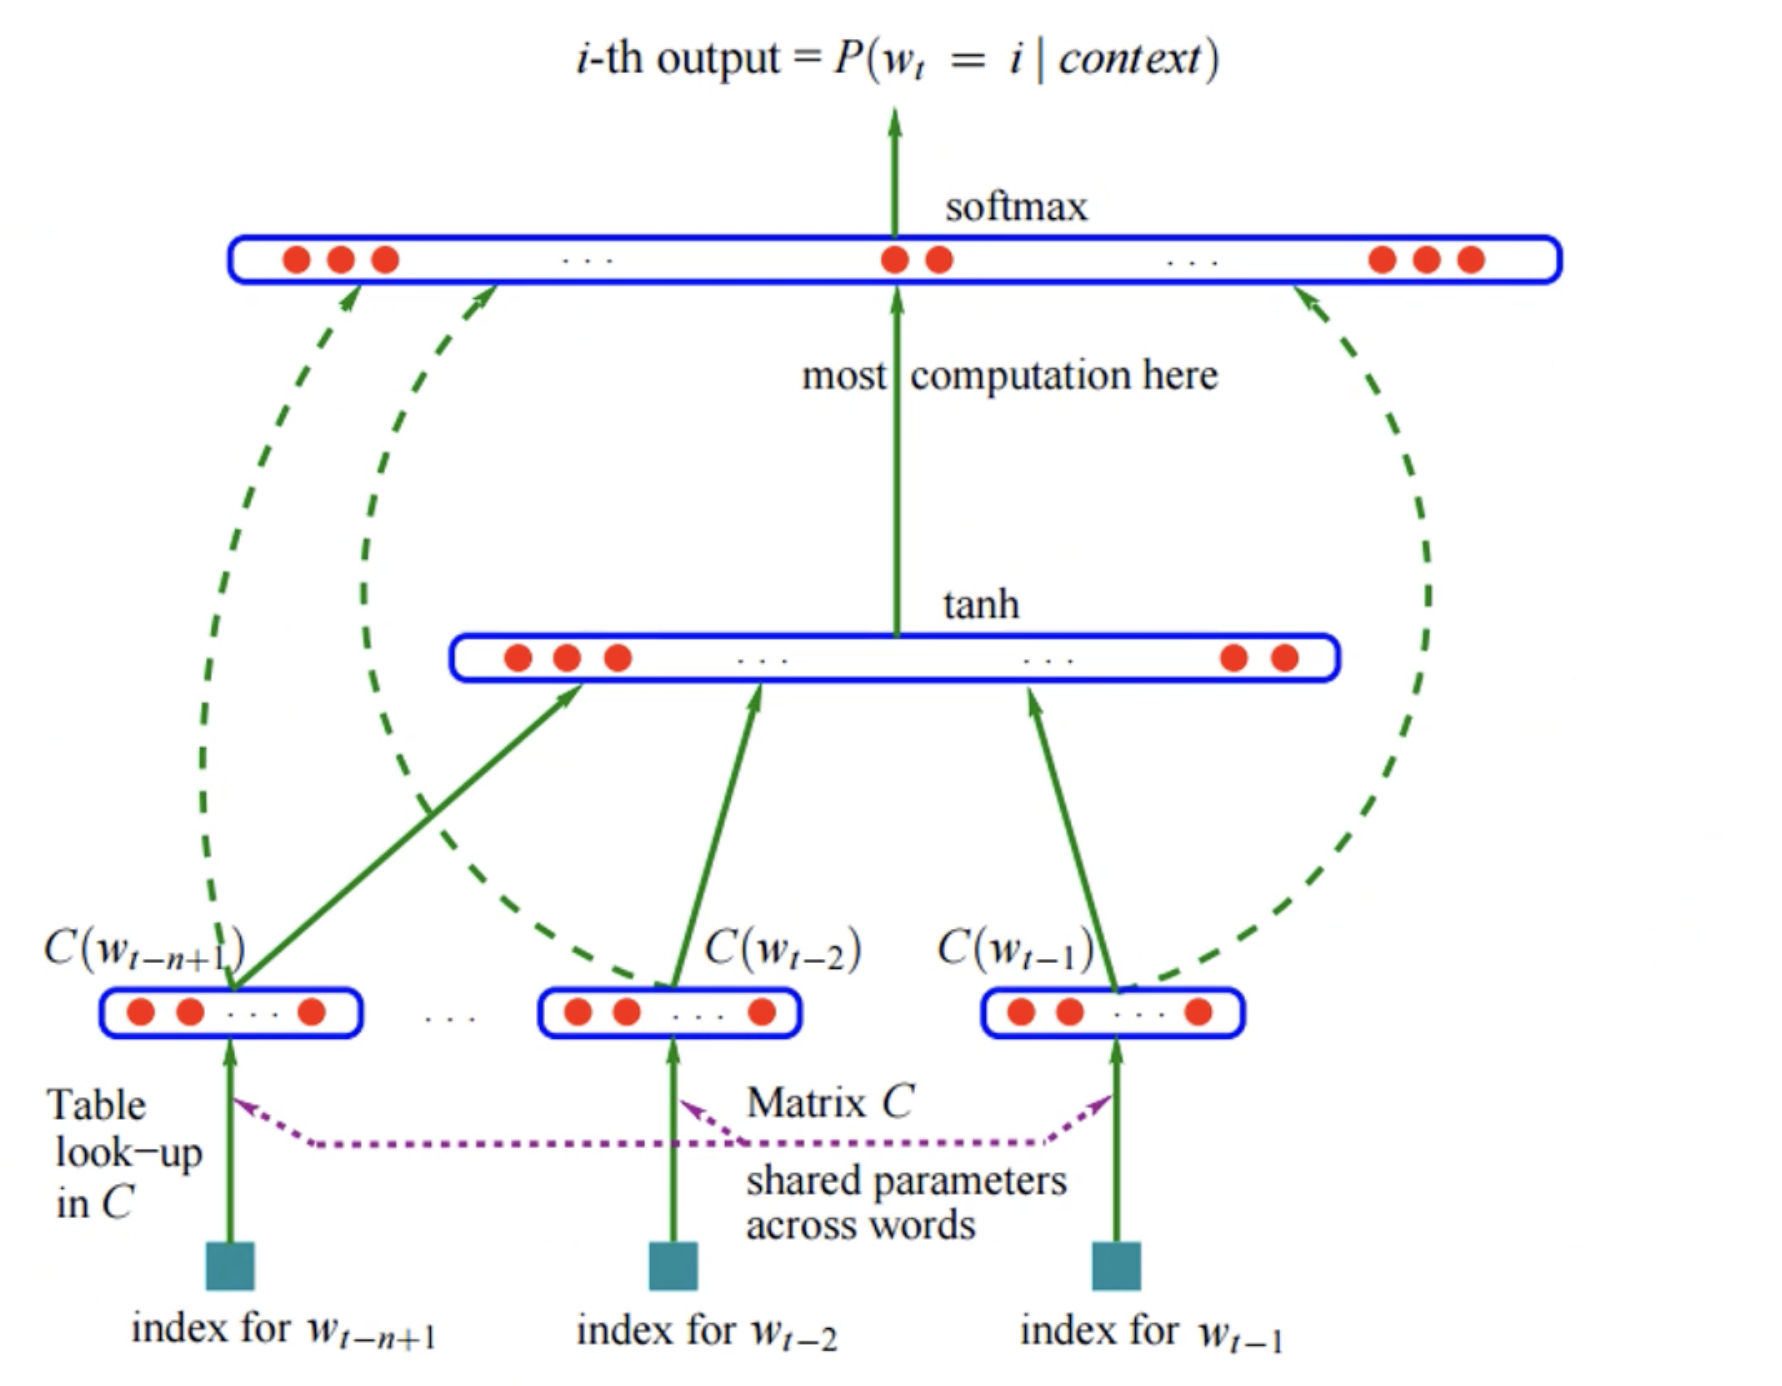

- Stochastic gradient ascent  

$$ θ ← θ + \varepsilon\frac{∂ log \hat{P}(w_t|w_{t-1}, ⋯ ,w_{t-n+1})}{∂θ} $$